In [1]:
pip install twstock

Note: you may need to restart the kernel to use updated packages.


In [2]:
from twstock import Stock
stock = Stock('2330')
type(stock)

twstock.stock.Stock

In [4]:
data = stock.fetch_from(2018, 1)
stock_number = 25932070992
int(data[-1].capacity) / stock_number

0.0034808847325709957

In [6]:
clear_list = [(i.open /1000, i.high/1000, i.low/1000, i.close/1000, i.capacity/stock_number) for i in data]

In [10]:
target_list = [i[3] for i in clear_list]

In [61]:
import tensorflow as tf
import numpy as np
import random

class Neuron:
    random.seed(42)
    def __init__(self, samples:tf.constant, targets:tf.constant, epoches:int):
        self.samples = samples
        self.targets = targets
        self.weights = tf.Variable([random.random() for _ in range(self.samples.shape[1])], dtype=tf.float32)
        self.epoches = epoches
        self.learning_rate = 0.0001
        self.convergence = 0.001
    
    def train(self):
        for current_epoch in range(self.epoches):
            error_value = 0.0
            with tf.GradientTape() as tape:
                predictions = tf.reduce_sum(self.samples * self.weights, axis=1)
                loss = tf.reduce_mean(0.5 * tf.square(self.targets - predictions))
                error_value = loss.numpy()
            
            gradients = tape.gradient(loss, [self.weights])
            self.weights.assign_sub(self.learning_rate * gradients[0])
            if error_value <= self.convergence:
                break

    def predict(self, samples):
        samples_tensor = tf.constant(samples, dtype=tf.float32)
        predictions = tf.reduce_sum(samples_tensor * self.weights, axis=1)
        for sample, prediction in zip(samples, predictions.numpy()):
            print(f"Sample: {sample}, Prediction: {prediction}")
            yield prediction



In [21]:
clear_list[-2]

(0.988, 0.995, 0.97, 0.97, 0.004262734898192354)

In [27]:
train_samples = tf.constant(clear_list[:-30], dtype=tf.float32)
valid_samples = tf.constant(clear_list[-30:-1], dtype=tf.float32)
print(len(train_samples), len(valid_samples))
print(train_samples[-1],"\n",valid_samples[-1])

1566 29
tf.Tensor([0.885     0.888     0.879     0.879     0.0017156], shape=(5,), dtype=float32) 
 tf.Tensor([0.988      0.995      0.97       0.97       0.00426273], shape=(5,), dtype=float32)


In [29]:
train_targets = tf.constant(target_list[1:-29], dtype=tf.float32)
valid_tragets = tf.constant(target_list[-29:], dtype=tf.float32)
print(len(train_targets), len(valid_tragets))
print(train_targets[-1],"\n",valid_tragets[-1])

1566 29
tf.Tensor(0.883, shape=(), dtype=float32) 
 tf.Tensor(0.939, shape=(), dtype=float32)


In [66]:
nn = Neuron(samples=train_samples, targets=train_targets, epoches=100)
nn.train()
predictions = nn.predict(valid_samples)

Sample: [0.892      0.895      0.883      0.883      0.00221485], Prediction: 0.8477660417556763
Sample: [0.888      0.914      0.888      0.909      0.00200042], Prediction: 0.8616563677787781
Sample: [0.923      0.935      0.911      0.919      0.00230048], Prediction: 0.8827149271965027
Sample: [0.916      0.922      0.905      0.922      0.00166934], Prediction: 0.8746419548988342
Sample: [0.913      0.925      0.913      0.921      0.00111046], Prediction: 0.8751524090766907
Sample: [0.944      0.95       0.94       0.943      0.00157606], Prediction: 0.8999576568603516
Sample: [0.953      0.984      0.953      0.981      0.00295712], Prediction: 0.9279058575630188
Sample: [0.971      0.981      0.971      0.981      0.00201083], Prediction: 0.930188000202179
Sample: [0.961      0.978      0.96       0.97       0.00377894], Prediction: 0.9251554608345032
Sample: [0.958      0.96       0.94       0.94       0.00285676], Prediction: 0.9083079099655151
Sample: [0.925      0.945      

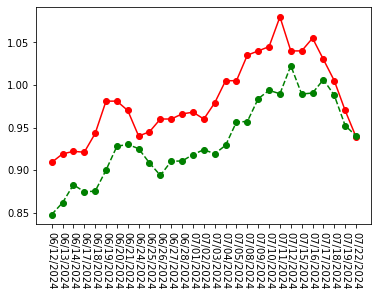

In [67]:
import matplotlib.pyplot as plt
x = [i.date.strftime("%m/%d/%Y") for i in data[-29:]]
plt.xticks(rotation=-90) 
y = target_list[-29:]
plt.plot(x, y, 'ro-', x, list(predictions), 'go--') 
plt.show()